![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### import libraries

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import re
import functools as ft

#natural language processing
#pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#visualizations
#!pip install wordcloud
from wordcloud import WordCloud
from pylab import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vlad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now that we have seen the results of our initial classification models, we can draw a few conclusions. First, the model is using words from the entire Kickstarter dataset to predict the 'state' of a campaign. This is useful, however, it would make more sense to fit these classifications to the seperate genres of the kickstarter dataset. The poor performace of our previous classification algorithms also supports this.

By splitting our data and only looking at the top 5 genres of the dataset, I hope to increase the performance of the models, as well as have a more effective and insightful conclusion that future Kickstarter entrepreneurs can use. ie) If someone looking to start a movie campaign on Kickstarter wants to see what descriptive words perform well on the website, they won't find the previous classification models useful. Classification that uses all the words of the entire corpus to predict the campaign state is too general and saturated to provide any real-world implications for an actually Kickstarter campaign. Therefore, Ithe following sections will explore a more genre-specific set of data. 

# Step 6 - Filtering Data & NLP
    a) Importing data
    
    b) Filtering
        -seperate cleaned2_df top-5 genres into their own dataframes
    
    c) Create Corpora
        -use previous NLP techniques to build seperate corpora for each new dataframe
    
    d) Save new data to .csv

### a) Importing data

In [17]:
#import cleaned2_data.csv file
cleaned2_df = pd.read_csv("cleaned2_data.csv")

cleaned2_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned2_df.shape)
print(cleaned2_df['subgenre'].value_counts())

(60841, 22)
music          11969
film            7808
publishing      7578
art             7022
comics          3639
food            3621
technology      3309
fashion         2595
theater         2538
games           2444
dance           2398
photography     1731
crafts          1616
design          1400
journalism      1173
Name: subgenre, dtype: int64


### b) Filter Data

In [24]:
#filter top-5 subgenres into their own dataframes

music_df = cleaned2_df.loc[cleaned2_df['subgenre'] == 'music']
music_df.reset_index(drop=True,inplace=True)

film_df = cleaned2_df.loc[cleaned2_df['subgenre'] == 'film']
film_df.reset_index(drop=True,inplace=True)

publishing_df = cleaned2_df.loc[cleaned2_df['subgenre'] == 'publishing']
publishing_df.reset_index(drop=True,inplace=True)

art_df = cleaned2_df.loc[cleaned2_df['subgenre'] == 'art']
art_df.reset_index(drop=True,inplace=True)

comics_df = cleaned2_df.loc[cleaned2_df['subgenre'] == 'comics']
comics_df.reset_index(drop=True,inplace=True)

### c) Create Corpora

##### music_df

In [29]:
length = len(pd.DataFrame(music_df['blurb']))

music_corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', music_df['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    music_corpus.append(blurb)

In [33]:
#write into a dataframe
music_corpus_df = pd.DataFrame(music_corpus, columns = ['blurb'])
music_corpus_df.head()

,blurb
0,washington dc rock n roll band need help press...
1,four year since released solo record last card...
2,denver rock band hate seek fund release second...
3,august traveling africa work child uganda writ...
4,mitzi bulman heart gold little bullhead imperi...


##### film_df

In [35]:
length = len(pd.DataFrame(film_df['blurb']))

film_corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', film_df['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    film_corpus.append(blurb)

In [36]:
#write into a dataframe
film_corpus_df = pd.DataFrame(film_corpus, columns = ['blurb'])
film_corpus_df.head()

,blurb
0,genesis follows mother son live together forei...
1,l short fan film follows spartan linda event h...
2,four friend embark road trip together hope ove...
3,juxtaposing delicious food good friend unsettl...
4,dr sotnikov spent life pursuit evil however ta...


##### publishing_df

In [37]:
length = len(pd.DataFrame(publishing_df['blurb']))

publishing_corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', publishing_df['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    publishing_corpus.append(blurb)

In [38]:
#write into a dataframe
publishing_corpus_df = pd.DataFrame(publishing_corpus, columns = ['blurb'])
publishing_corpus_df.head()

,blurb
0,thema literary society proposes publish one th...
1,collection hand lettered thing say idea sentim...
2,monster skulking dark king bent destroying lig...
3,spark child interest write draw anytime anywhe...
4,voice multi genre fiction anthology hero disab...


##### art_df

In [39]:
length = len(pd.DataFrame(art_df['blurb']))

art_corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', art_df['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    art_corpus.append(blurb)

In [40]:
#write into a dataframe
art_corpus_df = pd.DataFrame(art_corpus, columns = ['blurb'])
art_corpus_df.head()

,blurb
0,th anniversary year fsf revolutionary abstract...
1,let paint tv going search creativity space mis...
2,mosaic mural westside avenue adult center vent...
3,project make animal mask artistic skill develo...
4,gi normous print printing large scale x woodcu...


##### comics_df

In [41]:
length = len(pd.DataFrame(comics_df['blurb']))

comics_corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', comics_df['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    comics_corpus.append(blurb)

In [42]:
#write into a dataframe
comics_corpus_df = pd.DataFrame(comics_corpus, columns = ['blurb'])
comics_corpus_df.head()

,blurb
0,paranormal thriller keep toe alexander try sol...
1,joey wake alone empty city must find peace lon...
2,sci fi fantasy graphic novel series
3,dandelion king trans medium graphic novel incl...
4,young woman native american mentor hunting fat...


### End of Step 6

In [43]:
#write music_corpus_df to a .csv
music_corpus_df.to_csv('music_corpus_data.csv')

#write music_df to a .csv
music_df.to_csv('music_data.csv')

In [44]:
#write film_corpus_df to a .csv
film_corpus_df.to_csv('film_corpus_data.csv')

#write film_df to a .csv
film_df.to_csv('film_data.csv')

In [45]:
#write publishing_corpus_df to a .csv
publishing_corpus_df.to_csv('publishing_corpus_data.csv')

#write publishing_df to a .csv
publishing_df.to_csv('publishing_data.csv')

In [46]:
#write art_corpus_df to a .csv
art_corpus_df.to_csv('art_corpus_data.csv')

#write art_df to a .csv
art_df.to_csv('art_data.csv')

In [47]:
#write comics_corpus_df to a .csv
comics_corpus_df.to_csv('comics_corpus_data.csv')

#write comics_df to a .csv
comics_df.to_csv('comics_data.csv')

##### Check for NaN Values in corpus_df

In [4]:
is_NaN = corpus_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = corpus_df[row_has_NaN]
print(rows_with_NaN)

      blurb
488     NaN
7702    NaN
19286   NaN
23773   NaN
36856   NaN
38213   NaN
40080   NaN
41753   NaN
47520   NaN
47648   NaN
48378   NaN


In [5]:
corpus_df = corpus_df.dropna()
print(corpus_df.isna().sum())

blurb    0
dtype: int64


### b) TF-IDF (Unigrams, Bigrams, and Trigrams)

##### i) Unigrams

In [6]:
#entire corpus series into seperate strings
corpus_series = corpus_df['blurb'].apply(lambda x: str(x))
print(type(corpus_series[0]))

print(len(corpus_series))
corpus_series

<class 'str'>
60830


0        educating community self sufficiency building ...
1        thema literary society proposes publish one th...
2        collection hand lettered thing say idea sentim...
3        genesis follows mother son live together forei...
4        help u bring art culture ballet community cent...
                               ...                        
60836    vox paper bull need piano pianist provide musi...
60837    torrefy need help printing first run new album...
60838    god blessed downloads first single alive need ...
60839    raising money make debut self released studio ...
60840    starting hot sauce company ground using native...
Name: blurb, Length: 60830, dtype: object

In [8]:
#getting unigrams  
vectorizer = CountVectorizer() 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for unigrams
vectorizer = TfidfVectorizer() 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
uni_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
uni_words = (uni_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", uni_words.head(20)) 

MemoryError: 

##### ii) Bigrams

In [12]:
#getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for bigrams
vectorizer = TfidfVectorizer(ngram_range =(2, 2)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
bi_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
bi_words = (bi_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", bi_words.head(20)) 

MemoryError: 

##### iii) Trigrams

In [9]:
#getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names())  

#applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray())  
  
#getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
tri_ranking = pd.DataFrame(data1, columns = ['term','rank']) 
tri_words = (tri_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", tri_words.head(20)) 

MemoryError: 

### c) Corpus Visualizations

In [10]:
print(corpus_df.head())
corpus_all = ' '.join(corpus_df['blurb'])

                                               blurb
0  educating community self sufficiency building ...
1  thema literary society proposes publish one th...
2  collection hand lettered thing say idea sentim...
3  genesis follows mother son live together forei...
4  help u bring art culture ballet community cent...


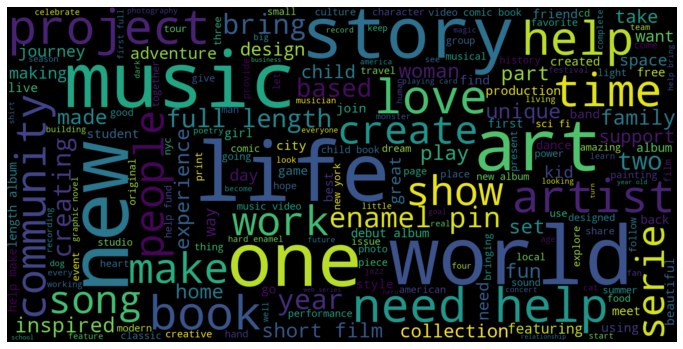

In [11]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(corpus_all)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
y_pos = np.arange(300)
plt.figure(figsize=(15,8))
s = 1
expected_zipf = [uni_ranking.sort_values(by='rank', ascending=False)['rank']/(i+1)**s for i in y_pos]
plt.bar(y_pos, uni_ranking.sort_values(by='rank', ascending=False)['rank'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 words')

NameError: name 'uni_ranking' is not defined

<Figure size 1080x576 with 0 Axes>

### End of Step 4